# Flight Price Prediction Project
## Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records                                                                                         
Size of test set: 2671 records                                                                                             
                                                                                                                           
FEATURES:

Airline: The name of the airline.                                                                                           
Date_of_Journey: The date of the journey                                                                                   
Source: The source from which the service begins.                                                                           
Destination: The destination where the service ends.                                                                       
Route: The route taken by the flight to reach the destination.                                                             
Dep_Time: The time when the journey starts from the source.                                                                
Arrival_Time: Time of arrival at the destination.                                                                          
Duration: Total duration of the flight.                                                                                    
Total_Stops: Total stops between the source and destination.                                                               
Additional_Info: Additional information about the flight                                                                   
Price: The price of the ticket                                                                                             
You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket.

In [212]:
import warnings
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler, power_transform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [142]:
df_train=pd.read_excel('Flifgt_Price_Train_set.xlsx')
df_test=pd.read_excel('Flight_Price_Test_set.xlsx')

In [131]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [132]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [133]:
df_train.shape

(10683, 11)

In [134]:
df_test.shape

(2671, 10)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Except price all arecategorical

In [109]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [8]:
df_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


there is so much difference between 75th percentile and maximum value and there is some difference between mean and median.

In [13]:
df_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Two columns Route and Total_Stops each  have 1 missing value

In [110]:
df_test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

there are no nan values

In [143]:
print(f"Rows and Columns before dropping duplicates: ", df_train.shape)
df_train.drop_duplicates(inplace=True)
print(f"Rows and Columns after dropping duplicates: ", df_train.shape)

Rows and Columns before dropping duplicates:  (10683, 11)
Rows and Columns after dropping duplicates:  (10463, 11)


In [144]:
print(f"Rows and Columns before dropping duplicates: ", df_test.shape)
df_test.drop_duplicates(inplace=True)
print(f"Rows and Columns after dropping duplicates: ", df_test.shape)

Rows and Columns before dropping duplicates:  (2671, 10)
Rows and Columns after dropping duplicates:  (2645, 10)


In [145]:
df_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [146]:
df_train.shape

(10463, 11)

we still see that there two columns having each one null value,we can just drop those two columns

In [147]:
df_train.dropna(inplace=True)

In [148]:
df_train.shape

(10462, 11)

In [149]:
df_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

now we see that all missing values and duplicate values are removed from the dataset

In [150]:
df_train.nunique().to_frame("Unique Values")

,Unique Values
Airline,12
Date_of_Journey,44
Source,5
Destination,6
Route,128
Dep_Time,222
Arrival_Time,1343
Duration,368
Total_Stops,5
Additional_Info,10


we can see number of unique values presen in the each column

In [151]:
def date_bifurcation(df):
    df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
    df['Year_of_Journey']=df['Date_of_Journey'].dt.year
    df['Month_of_Journey']=df['Date_of_Journey'].dt.month
    df['Day_of_Journey']=df['Date_of_Journey'].dt.day
    df=df.drop(['Route', 'Date_of_Journey'],axis=1)
    return df

Function for bifurcating datetime formats.We also removed route as we already heave info for source and destination and also numbe of stops.

In [152]:
df_train = date_bifurcation(df_train)

In [153]:
df_train.shape

(10462, 12)

In [154]:
df_test = date_bifurcation(df_test)

In [155]:
df_test.shape

(2645, 11)

In [156]:
def time_bifurcation(df):
    df['Departure_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
    df['Departure_minute']=pd.to_datetime(df['Dep_Time']).dt.minute
    df=df.drop(['Dep_Time'],axis=1)
    df['Arrival_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
    df['Arrival_minute']=pd.to_datetime(df['Arrival_Time']).dt.minute
    df=df.drop(['Arrival_Time'],axis=1)
    return df

In [157]:
df_train = time_bifurcation(df_train)


In [158]:
df_train.shape

(10462, 14)

In [159]:
df_test = time_bifurcation(df_test)

In [160]:
df_test.shape

(2645, 13)

In [96]:
df_train.nunique().to_frame("Unique Values")

,Unique Values
Airline,12
Source,5
Destination,6
Duration,368
Total_Stops,5
Additional_Info,10
Price,1870
Year_of_Journey,1
Month_of_Journey,7
Day_of_Journey,9


In [161]:
df_train.drop("Year_of_Journey", axis=1, inplace=True)

I am dropping the column named "Year_of_Journey" as it only has one unique value. 

In [162]:
df_test.drop("Year_of_Journey", axis=1, inplace=True)

In [167]:
## Let us convert Duration column into Hour and minute format:-
## Creating empty lists to contain hours and minute data
duration_hours =[]
duration_minutes =[]

duration = list(df_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip()+ " 0m"
        else:
            duration[i] = "0h " +duration[i]

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_minutes.append(int(duration[i].split(sep="m")[0].split()[-1]))
    




In [168]:
df_train["Duration_hours"] = duration_hours
df_train["Duration_min"] = duration_minutes

In [170]:
df_train.drop('Duration',axis=1,inplace = True )

In [172]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,3,24,22,20,1,10,2,50,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,15,7,25,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,9,25,4,25,19,0,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,18,5,23,30,5,25,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,16,50,21,35,4,45,45


In [173]:
## Let us convert Duration column into Hour and minute format in test data:-
## Creating empty lists to contain hours and minute data
duration_hours =[]
duration_minutes =[]

duration = list(df_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip()+ " 0m"
        else:
            duration[i] = "0h " +duration[i]

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_minutes.append(int(duration[i].split(sep="m")[0].split()[-1]))


In [174]:
df_test["Duration_hours"] = duration_hours
df_test["Duration_min"] = duration_minutes

In [176]:
df_test.drop('Duration',axis=1,inplace = True )

In [177]:
df_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Month_of_Journey,Day_of_Journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_min
0,Jet Airways,Delhi,Cochin,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,5,21,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,No info,5,21,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,non-stop,No info,6,24,23,55,2,45,2,50


In [190]:
df_train.drop(columns=['Additional_Info'],axis=1,inplace=True)

As morethan 90% of this column has no info,we can drop it off

In [188]:
df_test.drop(columns=['Additional_Info'],axis=1,inplace=True)

# Exploratory Data Analysis

# Univariate analysis

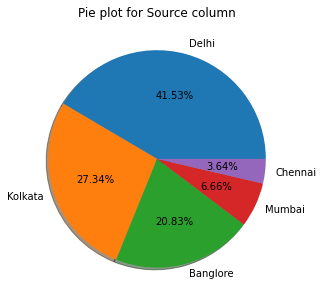

In [59]:

plt.figure(figsize=(10,5))
plt.title('Pie plot for Source column')
plt.pie(df_train['Source'].value_counts(), labels=df_train['Source'].value_counts().index, shadow=True, autopct='%1.2f%%')
plt.show()   

In the source column we have the highest number of rows covered by Delhi and the lowest number of rows covered by Chennai

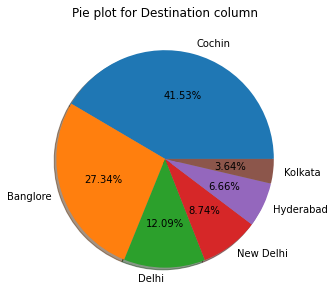

In [62]:
plt.figure(figsize=(10,5))
plt.title('Pie plot for Destination column')
plt.pie(df_train['Destination'].value_counts(), labels=df_train['Destination'].value_counts().index, shadow=True, autopct='%1.2f%%')
plt.show() 

In the destination column we have the highest number of rows covered by Cochin and the lowest number of rows covered by Kolkata

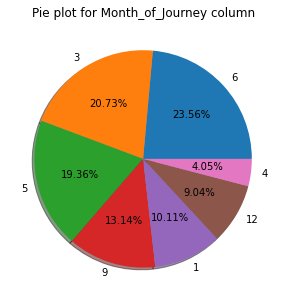

In [63]:
plt.figure(figsize=(10,5))
plt.title('Pie plot for Month_of_Journey column')
plt.pie(df_train['Month_of_Journey'].value_counts(), labels=df_train['Month_of_Journey'].value_counts().index, shadow=True, autopct='%1.2f%%')
plt.show() 

We see that in our data set that most of the journey made by people were in the month of June and least in the month of April

In [68]:
def generate_countplot(x):
    plt.figure(figsize=(10,5))
    sns.countplot(x)
    plt.xticks(rotation=90)
    plt.tight_layout()
    return plt.show()

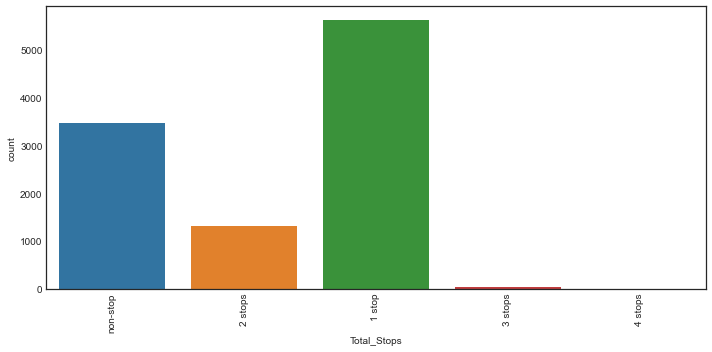

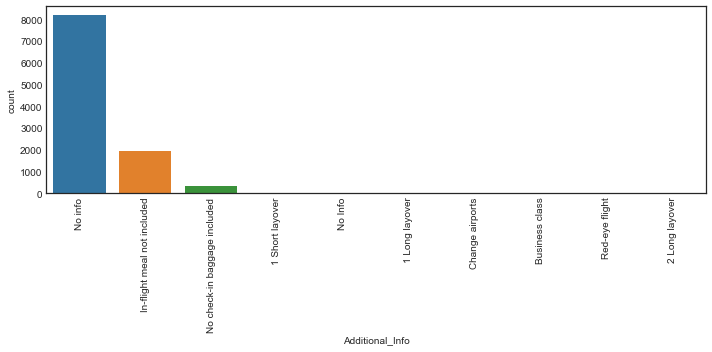

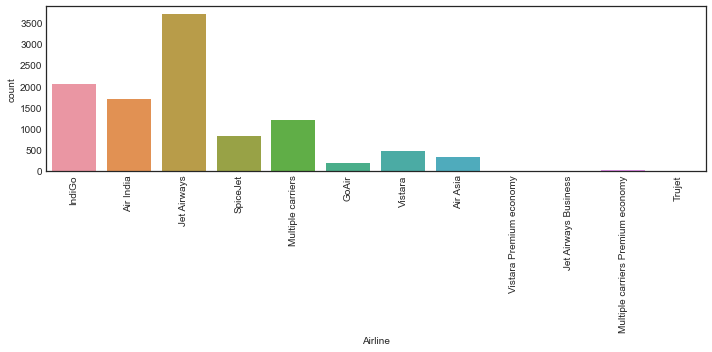

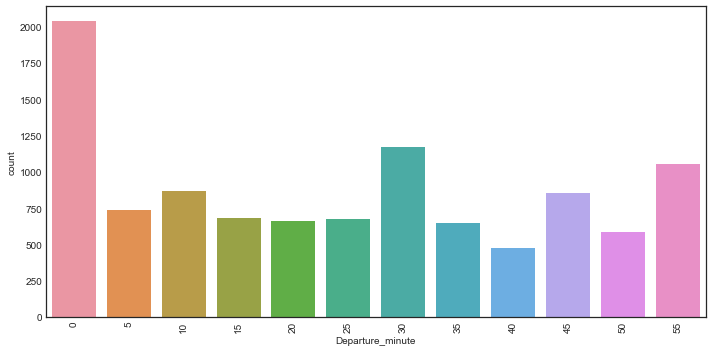

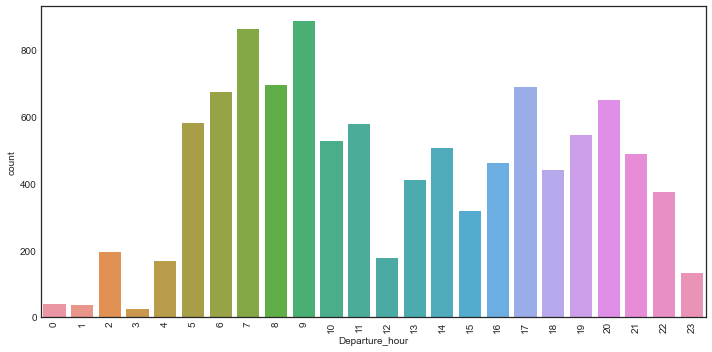

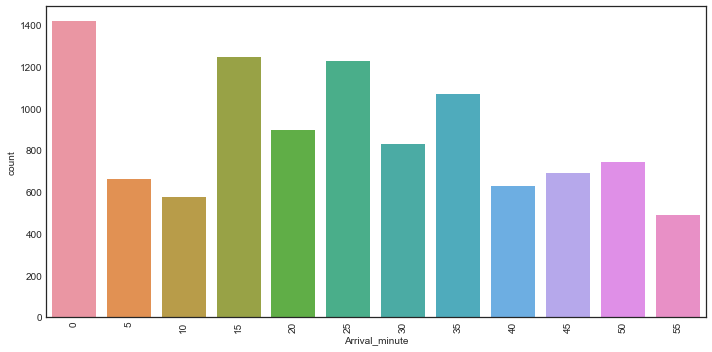

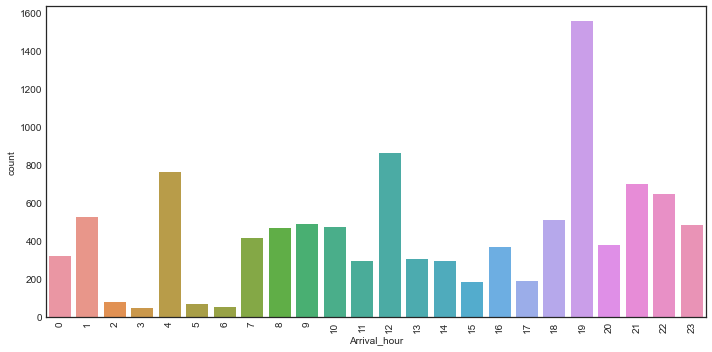

In [69]:
generate_countplot(df_train['Total_Stops'])
generate_countplot(df_train['Additional_Info'])
generate_countplot(df_train['Airline'])
generate_countplot(df_train['Departure_minute'])
generate_countplot(df_train['Departure_hour'])
generate_countplot(df_train['Arrival_minute'])
generate_countplot(df_train['Arrival_hour'])

1. In the total stops column we see highest count of rows covered by 1 stop flight hauls and the least numbers are for 3 and 4 stops
2. In additional information column most number of rows are covered by no info values and rest of the values cover very less to negligible data points
3. The airline column shows that highest number of flight details are present in our dataset for Jet Airways followed by Indigo and Air India
4. The departure minute column gives us the indication that most number of flights get scheduled at 0 minutes for departure
5. The departure hour column gives us the indication that most number of flights get scheduled at 7 and 9 hour morning time and then there is a spike at 17 and 20 hour evening time
6. The arrival minute column gives us the indication that most number of flights get scheduled at 0 minutes for arrival
7. The arrival hour column gives us the indication that most number of flights get scheduled at 19 hour in the evening and then the chosen option for arrivals are 12 in the noon or 4 in the night

In [70]:
df_train.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            10671, 10674, 10675, 10676, 10677, 10678, 10679, 10680, 10681,
            10682],
           dtype='int64', length=10462)

<AxesSubplot:xlabel='Price', ylabel='Density'>

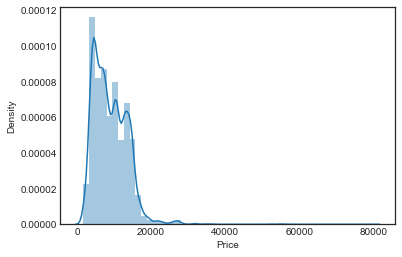

In [71]:
sns.distplot(df_train['Price'])

In the above  plot we are able to see that most of the flight price values are accumulated between 0-20000 and very rare data points are distributed abov that number.

## Multivariate Analysis

<AxesSubplot:xlabel='Source', ylabel='Price'>

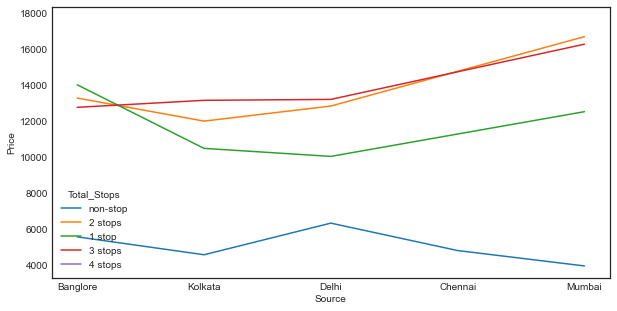

In [79]:

plt.figure(figsize=(10,5))
sns.lineplot(x='Source', y='Price', hue='Total_Stops', data=df_train, ci=None)

In the above line plot we see that non stop flights have lower price irrespective of the source as compared to flights that have 1 or more than 1 stops in the fligh haul.

<AxesSubplot:xlabel='Destination', ylabel='Price'>

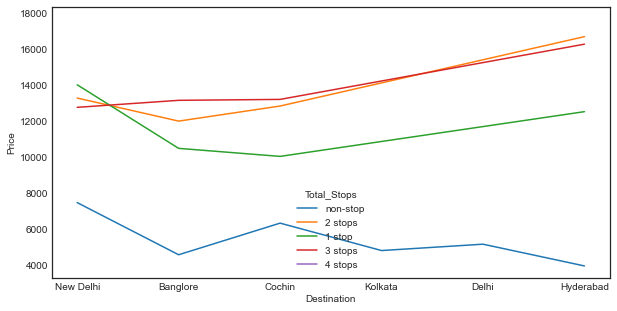

In [80]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Destination', y='Price', hue='Total_Stops', data=df_train, ci=None)

In the above line plot we see that non stop flights have lower price irrespective of the destination as compared to flights that have 1 or more than 1 stops in the fligh haul.

<AxesSubplot:xlabel='Month_of_Journey', ylabel='Price'>

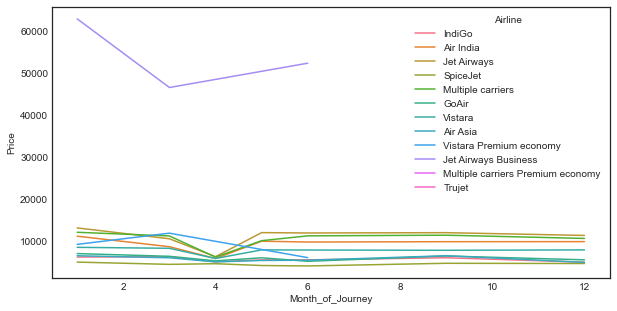

In [82]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Month_of_Journey', y='Price', hue='Airline', data=df_train, ci=None)

In the above line plot we see that Jet Airways Business class has the highest price than the rest possibly because the remaining offer the economy class data.

<AxesSubplot:xlabel='Day_of_Journey', ylabel='Price'>

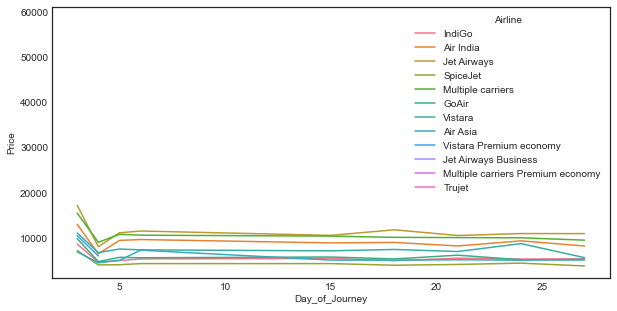

In [83]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Day_of_Journey', y='Price', hue='Airline', data=df_train, ci=None)


In the above line plot we see that all the airlines have high price between 1-5 days of a month and that reduces a bit on rest of the days apart from them.

In [181]:
df_train.columns


Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Month_of_Journey', 'Day_of_Journey', 'Departure_hour',
       'Departure_minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hours',
       'Duration_min'],
      dtype='object')

<AxesSubplot:xlabel='Duration_hours', ylabel='Price'>

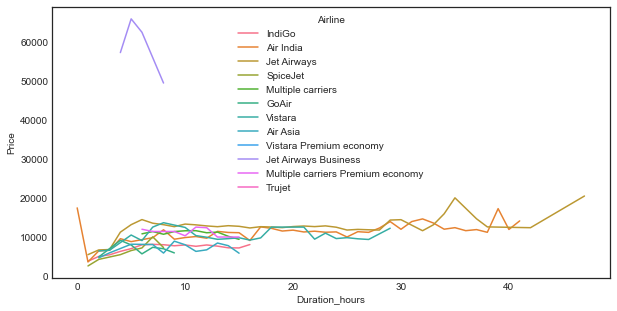

In [182]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Duration_hours', y='Price', hue='Airline', data=df_train, ci=None)


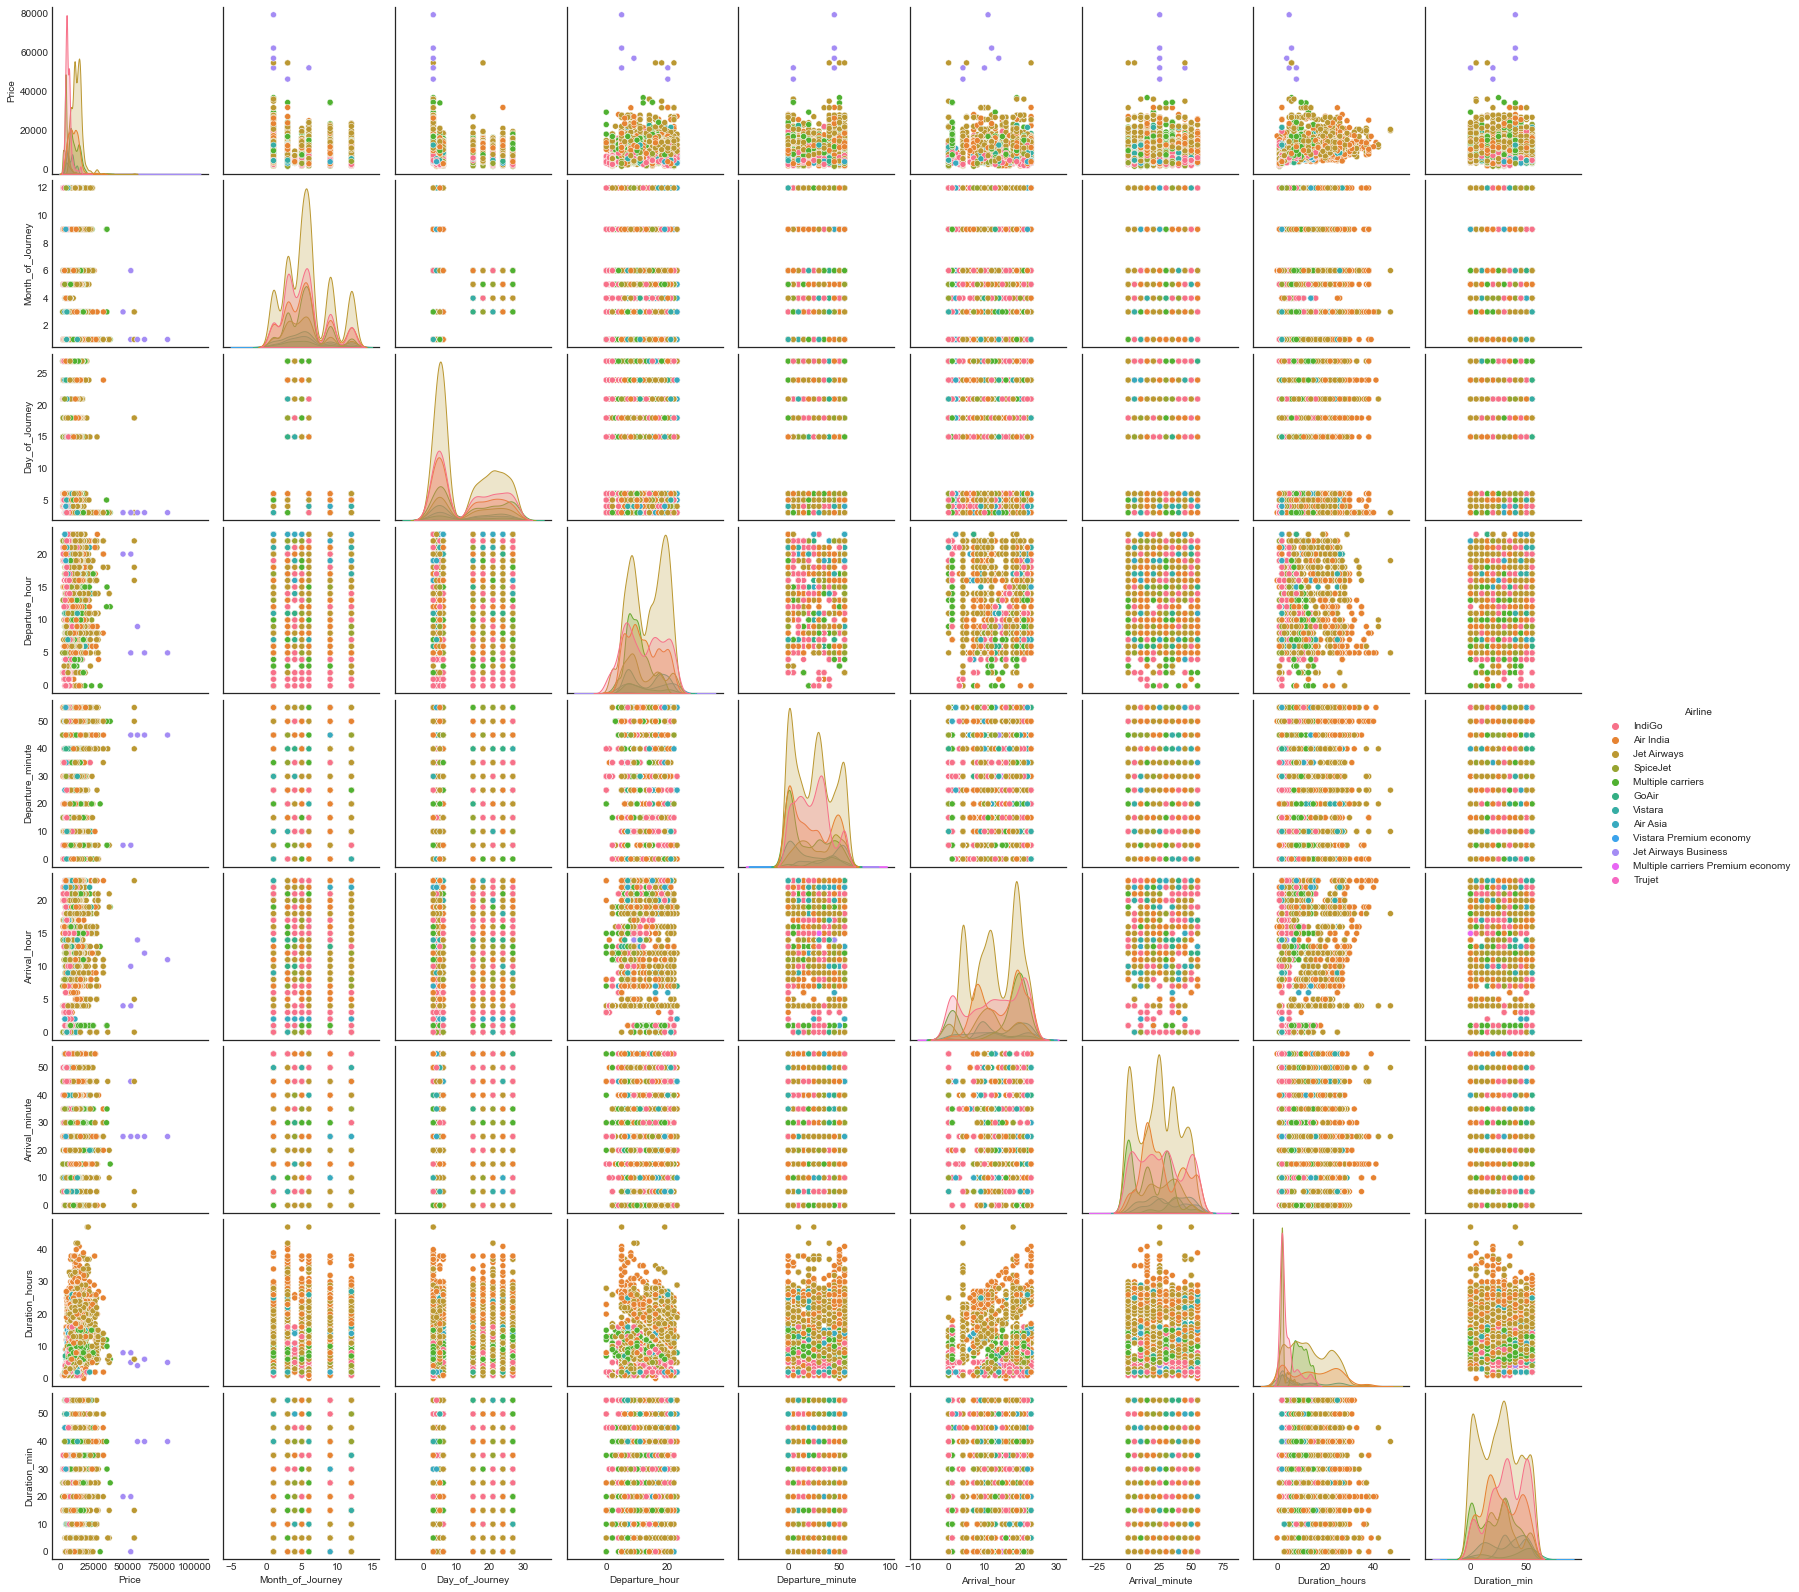

In [183]:
sns.pairplot(df_train,hue='Airline')

# Converting Categorical columns into Numerical column:

In [186]:
categorical_cols = ['Airline', 'Source', 'Destination'] 
df_train = pd.get_dummies(df_train, columns = categorical_cols,drop_first=True)

In [191]:
df_train.head()

,Total_Stops,Price,Month_of_Journey,Day_of_Journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,non-stop,3897,3,24,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2 stops,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2 stops,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1 stop,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1 stop,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [193]:
df_test = pd.get_dummies(df_test, columns = categorical_cols,drop_first=True)

In [195]:
df_test.head()

,Total_Stops,Month_of_Journey,Day_of_Journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1 stop,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1 stop,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1 stop,5,21,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1 stop,5,21,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,non-stop,6,24,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [196]:
## Now taking only numerical value from Total_Stops :-
df_train.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [197]:
df_test.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [198]:
df_train.head()

,Total_Stops,Price,Month_of_Journey,Day_of_Journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,3,24,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [199]:
df_test.head()

,Total_Stops,Month_of_Journey,Day_of_Journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,5,21,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,5,21,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,6,24,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


# Outliers:

Since all independent columns have categorical data,so we will not check for outliers.

# Skewness:

Since all independent columns have categorical data,so we will not check for skewness also.

# Splitting data between Features and labels:-

In [200]:
x = df_train.drop('Price',axis=1)
y= df_train['Price']

# Scaling using Standard Scaler:-

In [201]:
scaler=StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [202]:
x.head()

,Total_Stops,Month_of_Journey,Day_of_Journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,-1.214593,-0.846221,1.293326,1.662578,-0.234123,-1.807045,-0.888367,-0.958051,1.290990,-0.439548,...,-0.016936,-0.194406,-0.842802,-0.613365,-0.267165,-0.842802,-0.37087,-0.267165,-0.194406,3.232087
1,1.813062,-1.513956,-0.867922,-1.305841,1.360364,-0.056554,-0.586611,-0.361223,-0.190195,2.275064,...,-0.016936,-0.194406,-0.842802,1.630350,-0.267165,-0.842802,-0.37087,-0.267165,-0.194406,-0.309398
2,1.813062,1.156984,-0.754172,-0.607390,0.031625,-1.369422,0.016902,1.071164,-1.671380,-0.439548,...,-0.016936,-0.194406,1.186518,-0.613365,-0.267165,1.186518,-0.37087,-0.267165,-0.194406,-0.309398
3,0.299235,2.158586,-0.867922,0.964126,-1.031367,1.402189,0.318658,-0.599954,-0.190195,-0.439548,...,-0.016936,-0.194406,-0.842802,1.630350,-0.267165,-0.842802,-0.37087,-0.267165,-0.194406,-0.309398
4,0.299235,-1.513956,-1.095422,0.614900,1.360364,1.110440,0.620415,-0.719320,0.994753,-0.439548,...,-0.016936,-0.194406,-0.842802,-0.613365,-0.267165,-0.842802,-0.37087,-0.267165,-0.194406,3.232087


# train test split and model training

In [203]:
maxscore=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf = RandomForestRegressor()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    score=r2_score(y_test, pred)
    if score>maxscore:
        maxscore=score
        maxRS=i
print("Best accuracy is ",maxscore," on Random_state ",maxRS)

Best accuracy is  0.8363310346112407  on Random_state  74


In [209]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =13)

In [214]:
lr=LinearRegression()
dtr=DecisionTreeRegressor()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
adb=AdaBoostRegressor()
xgr=XGBRegressor()

In [218]:
algorithm=[lr,dtr,rf,knn,adb,xgr]
acc_models={}
for model in algorithm:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print("-"*100)
    acc_models[model]=round(r2_score(y_test,pred)*100,2)
    print(f"The model {model} has:: \n\t Accuracy :: {round(r2_score(y_test,pred)*100,1)}% \n\t Mean Absolute Error is :: {mean_absolute_error(y_test,pred)} \n\t Mean Squared Error is :: {mean_squared_error(y_test,pred)} \n\t Root Mean Squared Error is :: {np.sqrt(mean_squared_error(y_test,pred))}")
    print("-"*120)
    print("\n")

----------------------------------------------------------------------------------------------------
The model LinearRegression() has:: 
	 Accuracy :: -2.022364785604571e+27% 
	 Mean Absolute Error is :: 368186495778095.25 
	 Mean Squared Error is :: 4.255269071140542e+32 
	 Root Mean Squared Error is :: 2.0628303544258172e+16
------------------------------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
The model DecisionTreeRegressor() has:: 
	 Accuracy :: 68.2% 
	 Mean Absolute Error is :: 1360.6942763088032 
	 Mean Squared Error is :: 6694242.6808475815 
	 Root Mean Squared Error is :: 2587.3234588755195
------------------------------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
The model Rando

# Cross Validation:-

In [ ]:
cv_model={}
for model in algorithm:
    cvscore_={}
    print(f"\n{model}")
    print("-"*50)
    print("\n")
    for i in range(2,10):
        cvs = cross_val_score(model,x,y,cv=i)
        cvscore_[i]=cvs.mean()
        print(f"Mean of CV score model{model} is {cvscore_[i]} at k fold {i}\n" )
    CVdata=pd.DataFrame(cvscore_,index=[""])
    cv_model[str(model)]=CVdata.max(axis=1).tolist() 

In [219]:
for model in algorithm:
        cvs = cross_val_score(model,x,y,cv=10)
        print(f"mean cv score for model {model} is {cvs.mean()}")

        
    
    

mean cv score for model LinearRegression() is -26631.31391850782
mean cv score for model DecisionTreeRegressor() is 0.6971318079017064
mean cv score for model RandomForestRegressor() is 0.7978278975821078
mean cv score for model KNeighborsRegressor() is 0.7333844366628476
mean cv score for model AdaBoostRegressor() is 0.33206559731990937
mean cv score for model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_s

we see that XG boost regression giving highest CV score

# HyperParameter Tuning for XGBoost regressor

In [225]:
params= {'booster' : ['gbtree','dart','gblinear'],
              'importance_type' : ['gain','split'],
              'n_estimators' : [200],
              'eta' : [0.001, 0.01, 0.1]
             }

In [226]:
GSCV = GridSearchCV(XGBRegressor(),params, cv=10)

In [227]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_ca...p=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'booster': ['gbtree', 'dart', 'gblinear'],
                         'eta': [0.001, 0.01, 0.1],
                         'importance_type': ['gain', 'split'],
                         'n_estimators': [200]})

In [228]:
GSCV.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'importance_type': 'gain',
 'n_estimators': 200}

In [246]:
Final_Model = XGBRegressor(booster='gbtree', eta=0.1, importance_type='gain', n_estimators=200)
Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_r2 = r2_score(y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)
print(f" \nMean Squared Error is :: {mean_squared_error(y_test,fmod_pred)} \nRoot Mean Squared Error is :: {np.sqrt(mean_squared_error(y_test,fmod_pred))}\nRoot Mean Absolute Error is :: {mean_absolute_error(y_test,fmod_pred)}")

R2 score for the Best Model is: 82.55413168254825
 
Mean Squared Error is :: 3670794.922798785 
Root Mean Squared Error is :: 1915.9318679949934
Root Mean Absolute Error is :: 1203.390482474452


# Saving the best Regression ML model

In [234]:
filename = "flightprice.pkl"
joblib.dump(Final_Model, filename)

['flightprice.pkl']